## Exploratory Data Analysis

Partners: Anya Patel and Madeleine Harrell

### Preparations

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
# load heart_2020_cleaned.csv and display the data head
df = pd.read_csv('~/Downloads/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
# print the high-level information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# remove columns with too many missing values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
print("List of dropped columns:", end = " ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end = ", ")
print('\n')
df = df2

List of dropped columns: 



In [ ]:
# check for duplicates
df.duplicated().sum()

18078

In [ ]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Distribution Analysis

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  301717.000000   301717.000000  301717.000000  301717.000000
mean       28.441970        3.572298       4.121475       7.084559
std         6.468134        8.140656       8.128288       1.467122
min        12.020000        0.000000       0.000000       1.000000
25%        24.030000        0.000000       0.000000       6.000000
50%        27.410000        0.000000       0.000000       7.000000
75%        31.650000        2.000000       4.000000       8.000000
max        94.850000       30.000000      30.000000      24.000000


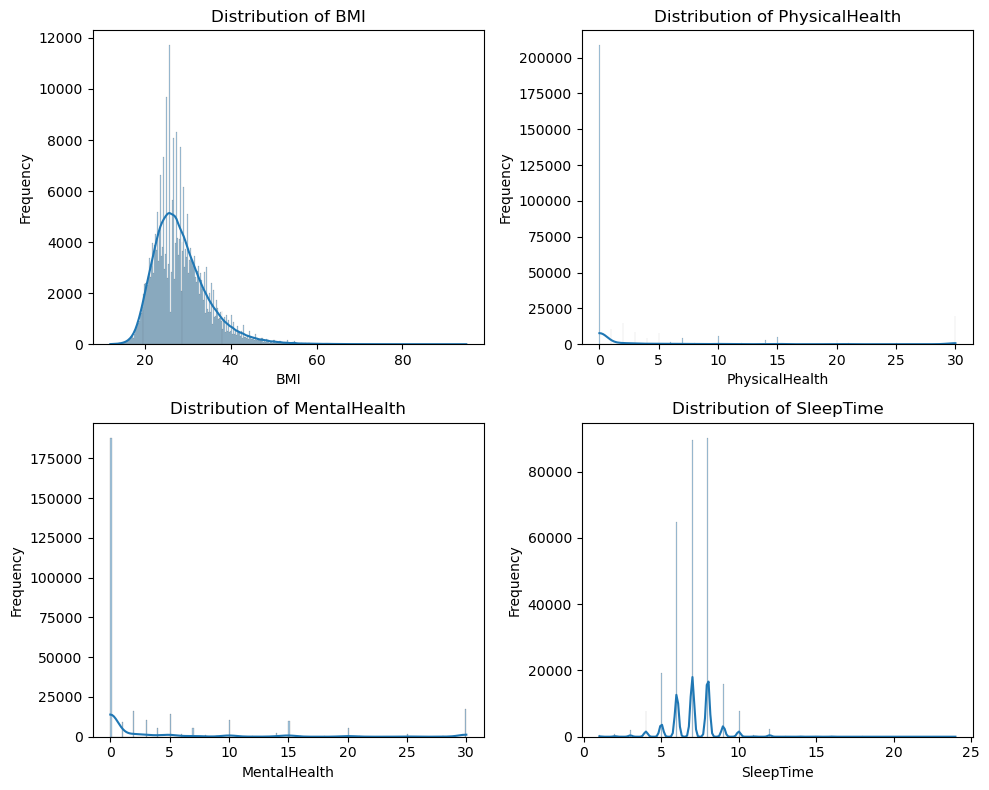

In [ ]:
# descriptive statistics of BMI, PhysicalHealth, MentalHealth, and SleepTime
descriptive_stats = df[["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]].describe()
print(descriptive_stats)

# distribution of BMI, PhysicalHealth, MentalHealth, and SleepTime
features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]
plt.figure(figsize = (10, 8))

for x, feature in enumerate(features, 1):
    plt.subplot(2, 2, x)
    sns.histplot(df[feature], kde = True, alpha = 0.4)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

There are 14 non numerical features including:
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


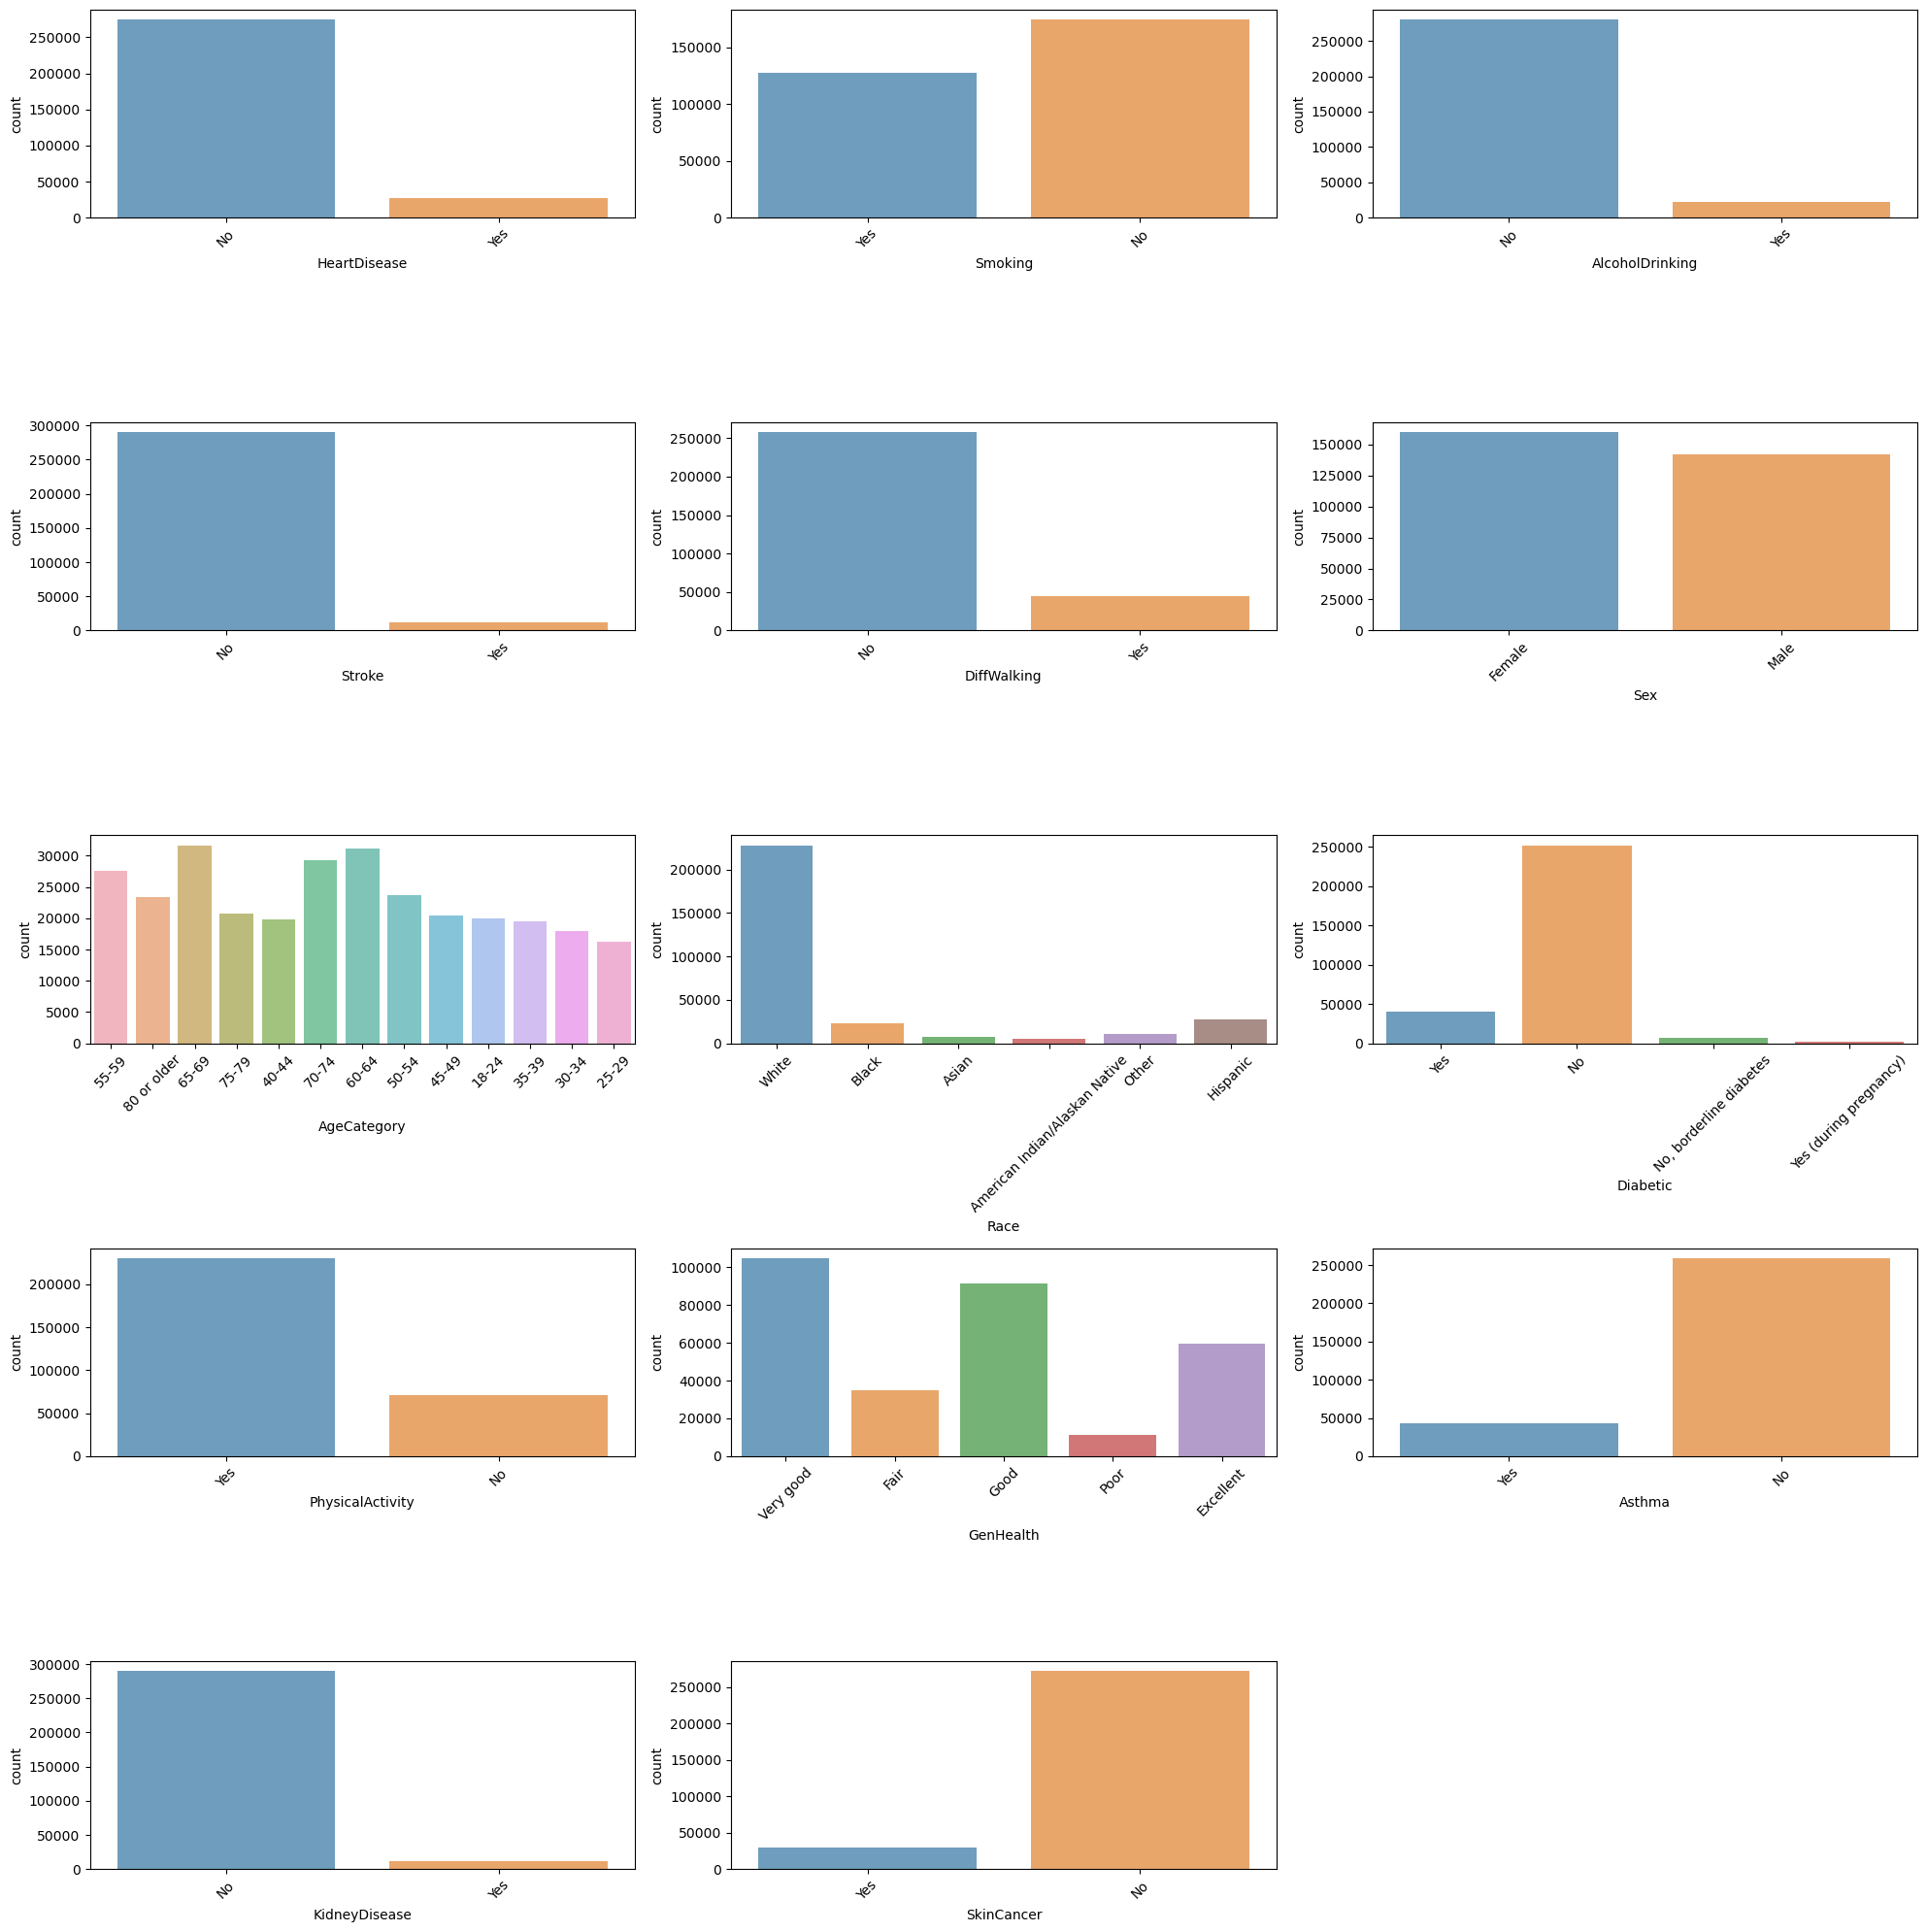

In [ ]:
# identification of categorical variables
df_cate = df.select_dtypes(include = ['O'])
print('There are {} non numerical features including:\n{}'.format(len(df_cate.columns), df_cate.columns.tolist()))

# distribution of categorical variables
fig, axes = plt.subplots(5, 3, figsize = (20, 20))

for i, ax in enumerate(axes.flatten()):
    if i < len(df_cate.columns):
        ax.tick_params(axis = 'x', rotation = 45)
        sns.countplot(x=df_cate.columns[i], alpha = 0.7, data = df_cate, ax = ax)
    else:
        ax.axis('off')

fig.tight_layout()
plt.show()

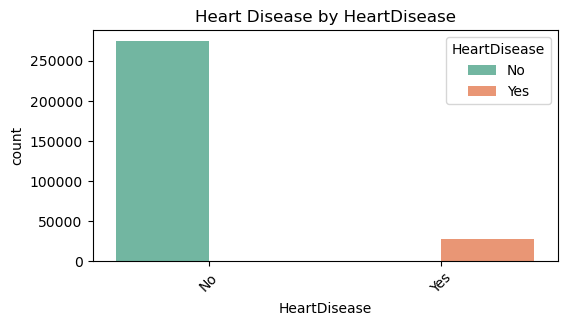

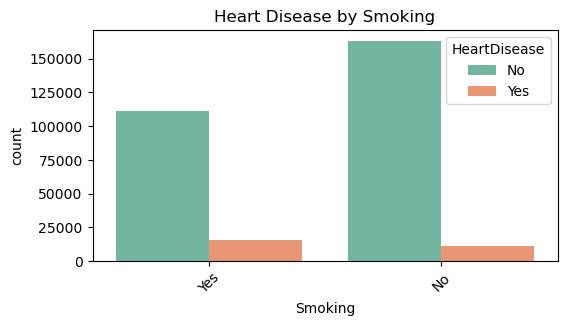

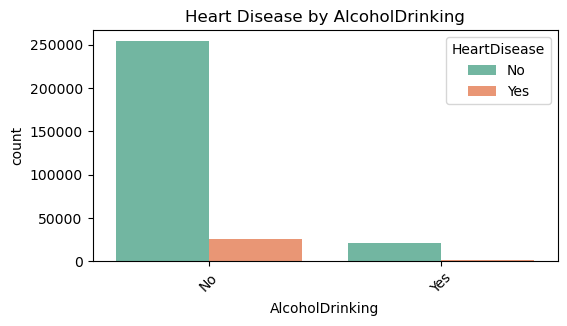

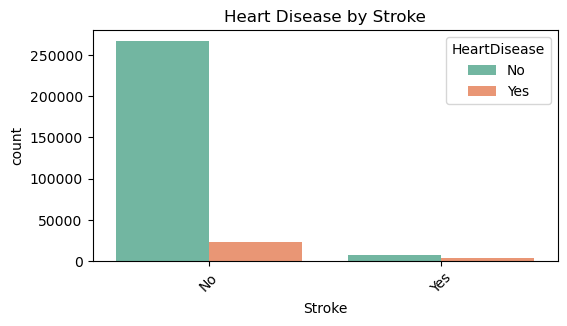

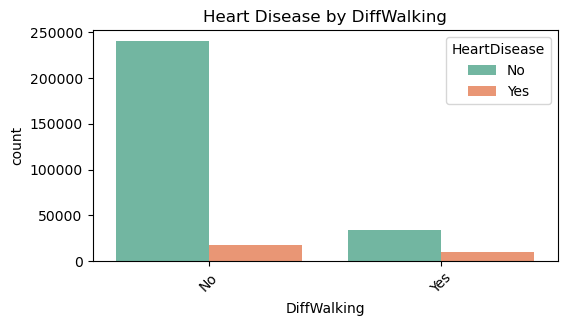

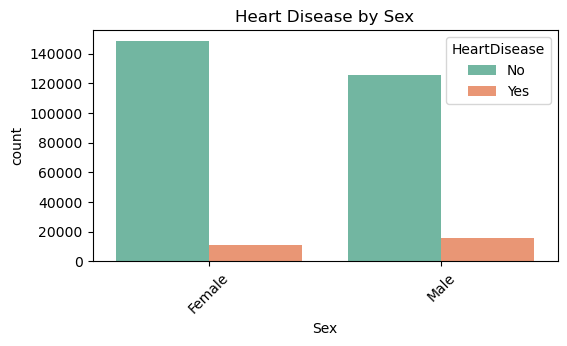

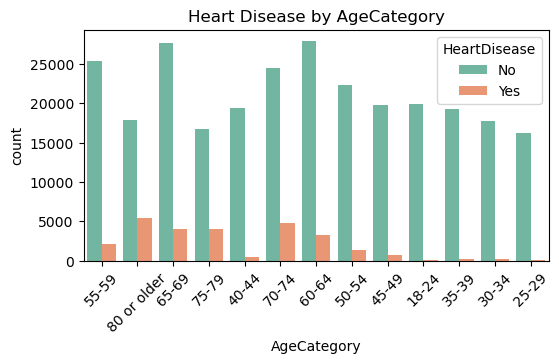

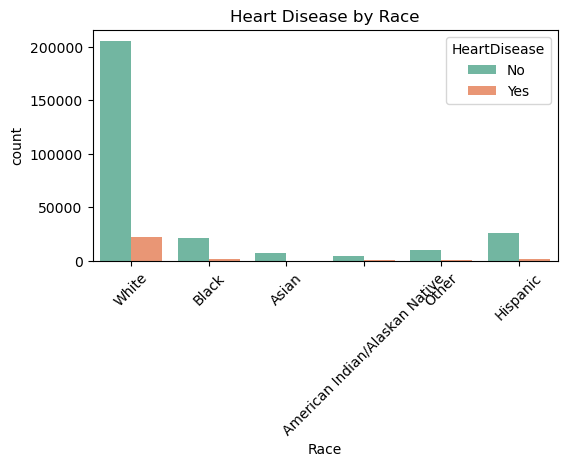

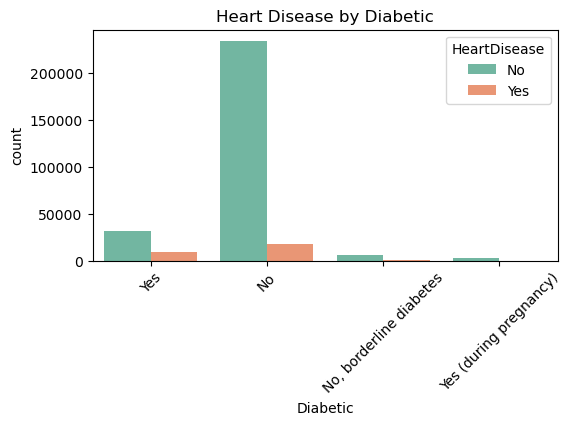

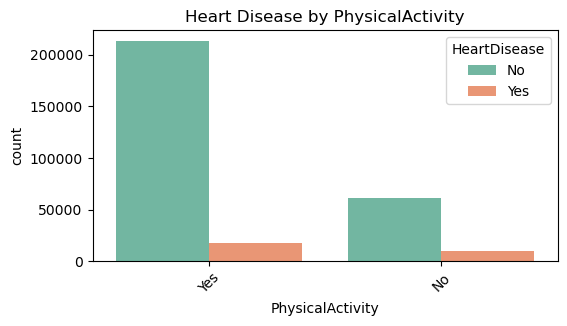

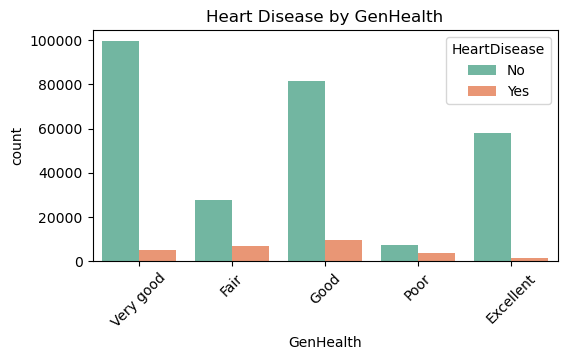

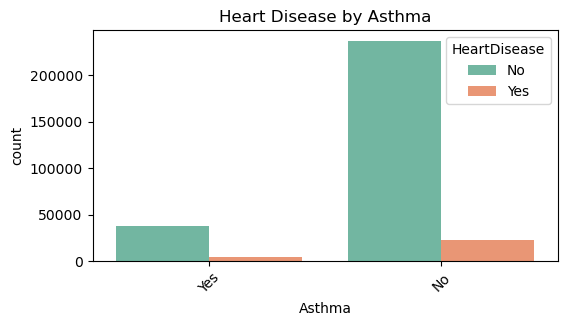

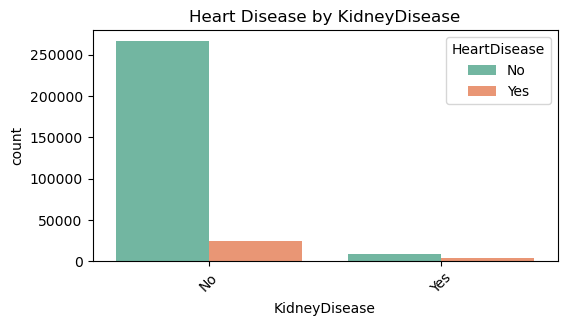

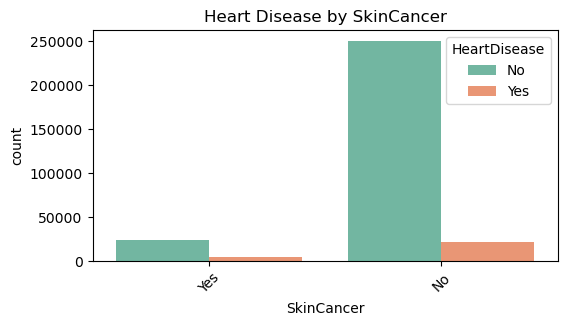

In [ ]:
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                        'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# relationship between HeartDisease and other categorical features
for feature in categorical_features:
    plt.figure(figsize = (6, 3))
    sns.countplot(data = df, x = feature, hue = 'HeartDisease', palette = 'Set2')
    plt.title(f'Heart Disease by {feature}')
    plt.xticks(rotation = 45)
    plt.show()

### Correlation Analysis

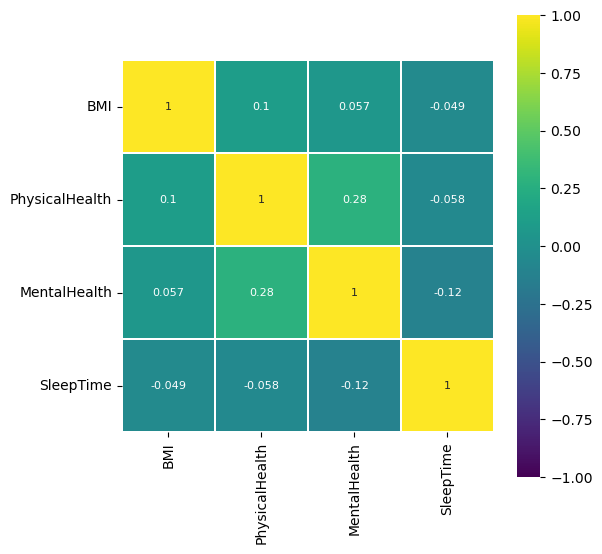

In [ ]:
# select numerical features
df_num = df.select_dtypes(include = 'number')

# visualize correlations with a heatmap
df_corr = df_num.corr(numeric_only = True)
plt.figure(figsize = (6, 6))

sns.heatmap(df_corr,
            cmap = 'viridis', vmax = 1.0, vmin = -1.0, linewidths = 0.1,
            annot = True, annot_kws = {"size": 8}, square = True);

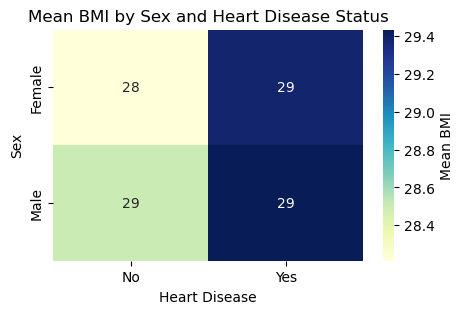

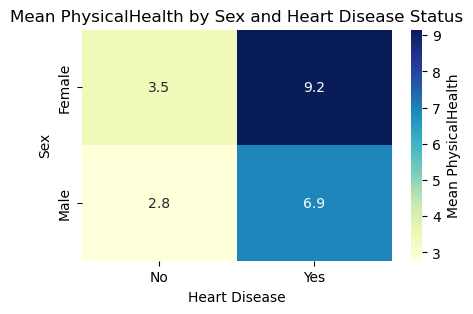

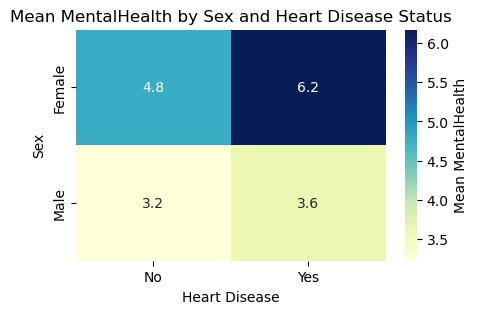

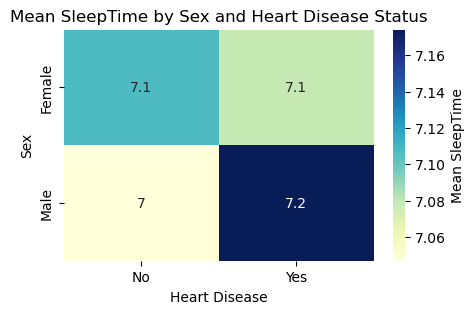

BMI            PhysicalHealth           MentalHealth  \
HeartDisease         No        Yes             No       Yes           No   
Sex                                                                        
Female        28.212287  29.380574       3.468139  9.152769     4.782565   
Male          28.502742  29.433776       2.771592  6.923293     3.225845   

                       SleepTime            
HeartDisease       Yes        No       Yes  
Sex                                         
Female        6.167395  7.107141  7.079194  
Male          3.608175  7.047040  7.173978

In [ ]:
# calculate mean values of numerical features for each combination of HeartDisease and another categorical variable
heatmap_data = df.groupby(['Sex', 'HeartDisease'])[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].mean().unstack()

# plot the heatmap for each numerical feature
for col in heatmap_data.columns.levels[0]:
    plt.figure(figsize = (5, 3))
    sns.heatmap(heatmap_data[col], annot = True, cmap = 'YlGnBu', cbar_kws = {'label': f'Mean {col}'})
    plt.title(f'Mean {col} by Sex and Heart Disease Status')
    plt.ylabel('Sex')
    plt.xlabel('Heart Disease')
    plt.show()

# show numerical heatmap data in a table
heatmap_data.head()

### Transforming Variables

In [ ]:
age_mapping = {
    '18-24': 'Young',
    '25-29': 'Young',
    '30-34': 'Adult',
    '35-39': 'Adult',
    '40-44': 'Adult',
    '45-49': 'Adult',
    '50-54': 'Adult',
    '55-59': 'Adult',
    '60-64': 'Old',
    '65-69': 'Old',
    '70-74': 'Old',
    '75-79': 'Old',
    '80 or older': 'Old'
}

# create NewAge column based on age_mapping dictionary
df['NewAge'] = df['AgeCategory'].map(age_mapping)

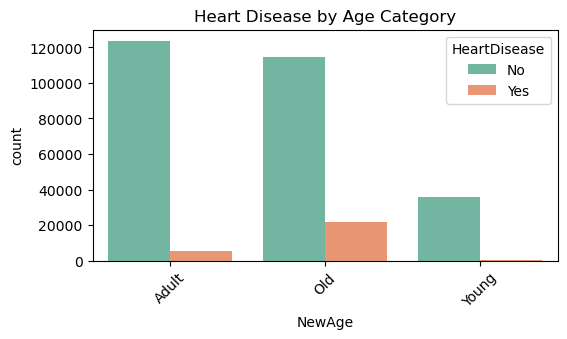

In [ ]:
# distribution of HeartDisease by NewAge
plt.figure(figsize = (6, 3))
sns.countplot(data = df, x = 'NewAge', hue = 'HeartDisease', palette='Set2')
plt.title('Heart Disease by Age Category')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
'''# identify columns where responses are "Yes" or "No" and change to 1 and 0, respectively
yes_no_columns = df.columns[(df == "Yes").any() | (df == "No").any()]
df[yes_no_columns] = df[yes_no_columns].applymap(lambda x: 1 if x == "Yes" else (0 if x == "No" else x))
df.head()'''

'# identify columns where responses are "Yes" or "No" and change to 1 and 0, respectively\nyes_no_columns = df.columns[(df == "Yes").any() | (df == "No").any()]\ndf[yes_no_columns] = df[yes_no_columns].applymap(lambda x: 1 if x == "Yes" else (0 if x == "No" else x))\ndf.head()'

In [ ]:
'''# change values in GenHealth column to be Poor = 0, Fair = 1, Good = 2, Very Good = 3, and Excellent = 4
df['GenHealth'] = df['GenHealth'].map({
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
})

df.head()'''

"# change values in GenHealth column to be Poor = 0, Fair = 1, Good = 2, Very Good = 3, and Excellent = 4\ndf['GenHealth'] = df['GenHealth'].map({\n    'Poor': 0,\n    'Fair': 1,\n    'Good': 2,\n    'Very good': 3,\n    'Excellent': 4\n})\n\ndf.head()"

## Data Pre-Processing

### Missing Data

In [ ]:
# calculate the missing ratio of each features column in dataframe
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio


In [ ]:
# show how many null values there are
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
NewAge              0
dtype: int64

### Transforming Numerical Variables That Should be Categorical

In [ ]:
'''df['PhysicalHealth'] = df['PhysicalHealth'].astype(str)
df['MentalHealth'] = df['MentalHealth'].astype(str)'''

"df['PhysicalHealth'] = df['PhysicalHealth'].astype(str)\ndf['MentalHealth'] = df['MentalHealth'].astype(str)"

## Feature Engineering

### Label Encoding

In [ ]:
'''NOT SURE THIS IS APPLICABLE??? -- see later in the notebook'''

'NOT SURE THIS IS APPLICABLE???'

### Adding Important Features

In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,Adult
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,Old
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,Old
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,Old
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,Old
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,Adult
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,Adult
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,Young


In [ ]:
# function for normalizing data in columns
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

In [ ]:
# create HealthRiskScore (higher score represents worse overall health)

# normalize columns factoring into HealthRiskScore
df['BMI_Score'] = normalize(df['BMI'])
df['PhysicalHealth_Score'] = normalize(df['PhysicalHealth'])
df['MentalHealth_Score'] = normalize(df['MentalHealth'])

# define weights
w1, w2, w3 = 2/5, 2/5, 1/5

# calculate HealthRiskScore
df['HealthRiskScore'] = (w1 * df['BMI_Score'] +
                         w2 * df['PhysicalHealth_Score'] +
                         w3 * df['MentalHealth_Score'])

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge,BMI_Score,PhysicalHealth_Score,MentalHealth_Score,HealthRiskScore
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Very good,5.0,Yes,No,Yes,Adult,0.055294,0.100000,1.0,0.262118
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,Very good,7.0,No,No,No,Old,0.100447,0.000000,0.0,0.040179
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Fair,8.0,Yes,No,No,Old,0.175782,0.666667,1.0,0.536979
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,Good,6.0,No,No,Yes,Old,0.147169,0.000000,0.0,0.058868
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,Very good,8.0,No,No,No,Adult,0.141132,0.933333,0.0,0.429786


In [ ]:
# create RiskBehaviorScore (higher score represents higher risk)

# change "Yes" to 1 and "No" to 0 for Smoking, AlcoholDrinking, and PhysicalActivity
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].map({'Yes': 1, 'No': 0})
df['PhysicalActivity'] = df['PhysicalActivity'].map({'Yes': 1, 'No': 0})

# calculate HealthRiskScore
df['RiskBehaviorScore'] = df['Smoking'] + df['AlcoholDrinking'] - df['PhysicalActivity']

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge,BMI_Score,PhysicalHealth_Score,MentalHealth_Score,HealthRiskScore,RiskBehaviorScore
0,No,16.60,1,0,No,3.0,30.0,No,Female,55-59,...,5.0,Yes,No,Yes,Adult,0.055294,0.100000,1.0,0.262118,0
1,No,20.34,0,0,Yes,0.0,0.0,No,Female,80 or older,...,7.0,No,No,No,Old,0.100447,0.000000,0.0,0.040179,-1
2,No,26.58,1,0,No,20.0,30.0,No,Male,65-69,...,8.0,Yes,No,No,Old,0.175782,0.666667,1.0,0.536979,0
3,No,24.21,0,0,No,0.0,0.0,No,Female,75-79,...,6.0,No,No,Yes,Old,0.147169,0.000000,0.0,0.058868,0
4,No,23.71,0,0,No,28.0,0.0,Yes,Female,40-44,...,8.0,No,No,No,Adult,0.141132,0.933333,0.0,0.429786,-1


### Skew Features

In [ ]:
from scipy.stats import skew

numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
AlcoholDrinking,3.325314
PhysicalHealth,2.500987
PhysicalHealth_Score,2.500987
MentalHealth,2.237459
MentalHealth_Score,2.237459
HealthRiskScore,2.106236
BMI_Score,1.297731
BMI,1.297731
SleepTime,0.697220
RiskBehaviorScore,0.630728


### Box Cox Transformation of (Highly) Skewed Features

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features with enough skew to justify applying the Box Cox transform.".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

There are 12 skewed numerical features with enough skew to justify applying the Box Cox transform.


In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge,BMI_Score,PhysicalHealth_Score,MentalHealth_Score,HealthRiskScore,RiskBehaviorScore
0,No,3.583611,0.730463,0.0,No,1.540963,4.492018,No,Female,55-59,...,2.055642,Yes,No,Yes,Adult,0.054037,0.095995,0.730463,0.236903,0.000000
1,No,3.884194,0.000000,0.0,Yes,0.000000,0.000000,No,Female,80 or older,...,2.440268,No,No,No,Old,0.096407,0.000000,0.000000,0.039509,-6.666667
2,No,4.298062,0.730463,0.0,No,3.858807,4.492018,No,Male,65-69,...,2.602594,Yes,No,No,Old,0.163916,0.530906,0.730463,0.443977,0.000000
3,No,4.151276,0.000000,0.0,No,0.000000,0.000000,No,Female,75-79,...,2.259674,No,No,Yes,Old,0.138721,0.000000,0.000000,0.057446,0.000000
4,No,4.118818,0.000000,0.0,No,4.380946,0.000000,Yes,Female,40-44,...,2.602594,No,No,No,Adult,0.133337,0.692943,0.000000,0.367286,-6.666667


### Split Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

## Machine Learning Algorithms

### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

copy = df.copy()

# label encoding converts cat features to numeric
for col in copy.select_dtypes(include = 'object').columns:
    le = LabelEncoder()
    copy[col] = le.fit_transform(copy[col])

# define features (X) and target variable (y)
X = copy.drop(columns = ['HeartDisease'])
y = copy['HeartDisease']

# split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# train the random forest classifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 23)
rf_model.fit(X_train, y_train)

# predict
y_pred = rf_model.predict(X_test)

# evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9041495426222989

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     82383
           1       0.37      0.09      0.15      8133

    accuracy                           0.90     90516
   macro avg       0.64      0.54      0.55     90516
weighted avg       0.87      0.90      0.88     90516


Confusion Matrix:
 [[81098  1285]
 [ 7391   742]]


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

copy = df.copy()

# label encoding converts cat features to numeric
for col in copy.select_dtypes(include = 'object').columns:
    le = LabelEncoder()
    copy[col] = le.fit_transform(copy[col])

# define features (X) and target variable (y)
X = copy.drop(columns = ['HeartDisease'])
y = copy['HeartDisease']

# split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


# train logistic regression model
logistic_regression = LogisticRegression(max_iter = 1000)
logistic_regression.fit(X_train, y_train)

# predict
y_pred = logistic_regression.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9103031508241637

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     82383
           1       0.50      0.09      0.15      8133

    accuracy                           0.91     90516
   macro avg       0.71      0.54      0.55     90516
weighted avg       0.88      0.91      0.88     90516


Confusion Matrix:
 [[81670   713]
 [ 7406   727]]


In [ ]:
# feature importance based logistic regression coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logistic_regression.coef_[0]
})

# sort by the absolute value of features' coefficients
feature_importance['AbsCoefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by = 'AbsCoefficient', ascending = False)

# Display top features
print("Top features based on logistic regression coefficients:")
print(feature_importance[['Feature', 'Coefficient']].head(10))

Top features based on logistic regression coefficients:
                 Feature  Coefficient
3                 Stroke     1.145560
18             BMI_Score    -1.097058
20    MentalHealth_Score     0.743963
7                    Sex     0.738804
15         KidneyDisease     0.683245
1                Smoking     0.602434
19  PhysicalHealth_Score    -0.523197
0                    BMI     0.468908
2        AlcoholDrinking    -0.398840
6            DiffWalking     0.389176
